In [6]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
df = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
# One hot encording
df_one_hot = pd.get_dummies(df)
df_one_hot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,False,True,True,False,False,True,False,False
1334,18,31.920,0,2205.98080,True,False,True,False,True,False,False,False
1335,18,36.850,0,1629.83350,True,False,True,False,False,False,True,False
1336,21,25.800,0,2007.94500,True,False,True,False,False,False,False,True


In [10]:
# Create x & y
x = df_one_hot.drop("charges",axis=1)
y = df_one_hot["charges"]

x.head() , y.head()

(   age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
 0   19  27.900         0        True     False      False        True   
 1   18  33.770         1       False      True       True       False   
 2   28  33.000         3       False      True       True       False   
 3   33  22.705         0       False      True       True       False   
 4   32  28.880         0       False      True       True       False   
 
    region_northeast  region_northwest  region_southeast  region_southwest  
 0             False             False             False              True  
 1             False             False              True             False  
 2             False             False              True             False  
 3             False              True             False             False  
 4             False              True             False             False  ,
 0    16884.92400
 1     1725.55230
 2     4449.46200
 3    21984.47061
 4     3866.85520
 

In [11]:
# Create traning and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [12]:
len(x), len(x_train), len(x_test)

(1338, 1070, 268)

In [13]:
x_train = x_train.values.astype(np.float32)
x_test = x_test.values.astype(np.float32)
y_train = y_train.values.astype(np.float32)
y_test = y_test.values.astype(np.float32)

In [19]:
# Build a neural network
tf.random.set_seed(42)

# 1. Create a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

# 3. Fit the model
insurance_model.fit(x_train,y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 10ms/step - loss: 8601.6631 - mae: 8601.6631
Epoch 2/100
34/34 [==============================] - 0s 8ms/step - loss: 7759.8467 - mae: 7759.8467
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7523.7612 - mae: 7523.7612
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7787.0693 - mae: 7787.0693
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7699.3257 - mae: 7699.3257
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7623.2183 - mae: 7623.2183
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7593.8501 - mae: 7593.8501
Epoch 8/100
34/34 [==============================] - 0s 4ms/step - loss: 7789.7944 - mae: 7789.7944
Epoch 9/100
34/34 [==============================] - 0s 10ms/step - loss: 7620.5005 - mae: 7620.5005
Epoch 10/100
34/34 [==============================] - 0s 9ms/step - loss: 7757.0425 - mae: 7757.04

In [20]:

insurance_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 10)                120       
                                                                 
 dense_19 (Dense)            (None, 1)                 11        
                                                                 
Total params: 131 (524.00 Byte)
Trainable params: 131 (524.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
insurance_model.evaluate(x_test,y_test)

9/9 [==============================] - 0s 3ms/step - loss: 7301.3779 - mae: 7301.3779


[7301.3779296875, 7301.3779296875]

## Improve the model

**Model_2**

In [26]:
# Build a neural network
tf.random.set_seed(42)

# 1. Create a model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["mae"])

# 3. Fit the model
insurance_model_2.fit(x_train,y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 4ms/step - loss: 13272.1113 - mae: 13272.1113
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 13092.6895 - mae: 13092.6895
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 12722.0537 - mae: 12722.0537
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 12007.4023 - mae: 12007.4023
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 10838.9746 - mae: 10838.9746
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 9389.8936 - mae: 9389.8936
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 8103.8413 - mae: 8103.8413
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 7522.3193 - mae: 7522.3193
Epoch 9/100
34/34 [==============================] - 0s 4ms/step - loss: 7431.9985 - mae: 7431.9985
Epoch 10/100
34/34 [==============================] - 0s 4ms/step - loss: 7412.7744 - mae:

In [27]:
insurance_model_2.evaluate(x_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4909.4014 - mae: 4909.4014


[4909.4013671875, 4909.4013671875]

**Model_3**

In [30]:
# Build a neural network
tf.random.set_seed(42)

# 1. Create a model
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["mae"])

# 3. Fit the model
history = insurance_model_3.fit(x_train,y_train,epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 4ms/step - loss: 13283.4736 - mae: 13283.4736
Epoch 2/200
34/34 [==============================] - 0s 5ms/step - loss: 13109.4873 - mae: 13109.4873
Epoch 3/200
34/34 [==============================] - 0s 4ms/step - loss: 12753.5830 - mae: 12753.5830
Epoch 4/200
34/34 [==============================] - 0s 4ms/step - loss: 12060.9775 - mae: 12060.9775
Epoch 5/200
34/34 [==============================] - 0s 4ms/step - loss: 10911.4990 - mae: 10911.4990
Epoch 6/200
34/34 [==============================] - 0s 4ms/step - loss: 9462.9199 - mae: 9462.9199
Epoch 7/200
34/34 [==============================] - 0s 4ms/step - loss: 8160.9980 - mae: 8160.9980
Epoch 8/200
34/34 [==============================] - 0s 4ms/step - loss: 7544.2646 - mae: 7544.2646
Epoch 9/200
34/34 [==============================] - 0s 3ms/step - loss: 7444.2573 - mae: 7444.2573
Epoch 10/200
34/34 [==============================] - 0s 4ms/step - loss: 7423.9922 - mae:

In [31]:
insurance_model_3.evaluate(x_test,y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3490.8315 - mae: 3490.8315


[3490.83154296875, 3490.83154296875]

Text(0.5, 0, 'epochs')

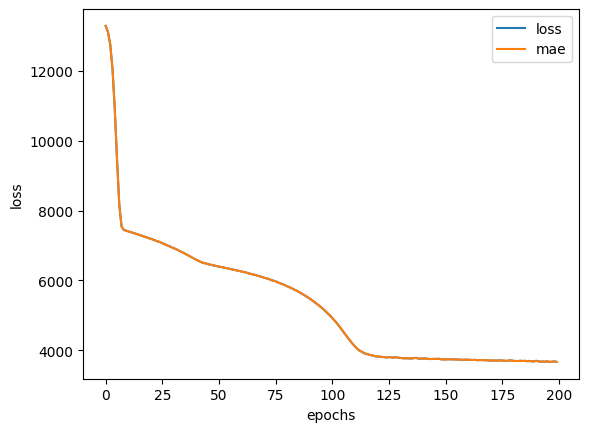

In [32]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

## Early Stopping

**Model_4**

In [ ]:
# Build a neural network
tf.random.set_seed(42)

# 1. Create a model
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_4.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["mae"])

# Early Stopping callback
es = tf.keras.callbacks.EarlyStopping(monitor="val_loss", mode='min', patience=20)


# 3. Fit the model
history = insurance_model_4.fit(x_train,y_train,validation_split=0.2,callbacks=[es],epochs=500)

In [34]:
insurance_model_4.evaluate(x_test,y_test)

9/9 [==============================] - 0s 7ms/step - loss: 3166.3118 - mae: 3166.3118


[3166.311767578125, 3166.311767578125]

Text(0.5, 0, 'epochs')

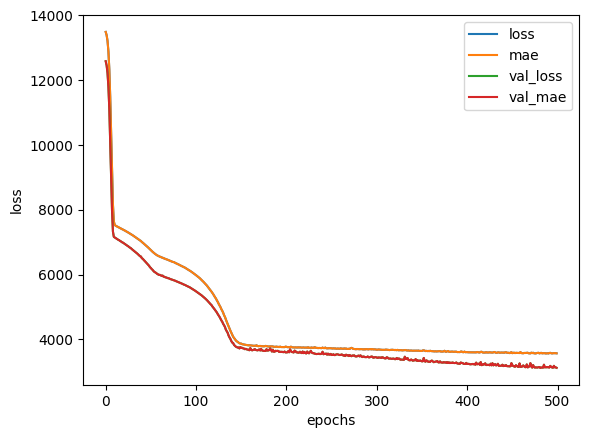

In [35]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

## Preprocessing data (normalization and standardization)

**Neural network prefer normalization**

In [36]:
x

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,True,False,False,True,False,False,False,True
1,18,33.770,1,False,True,True,False,False,False,True,False
2,28,33.000,3,False,True,True,False,False,False,True,False
3,33,22.705,0,False,True,True,False,False,True,False,False
4,32,28.880,0,False,True,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,False,True,True,False,False,True,False,False
1334,18,31.920,0,True,False,True,False,True,False,False,False
1335,18,36.850,0,True,False,True,False,False,False,True,False
1336,21,25.800,0,True,False,True,False,False,False,False,True


<Axes: ylabel='Frequency'>

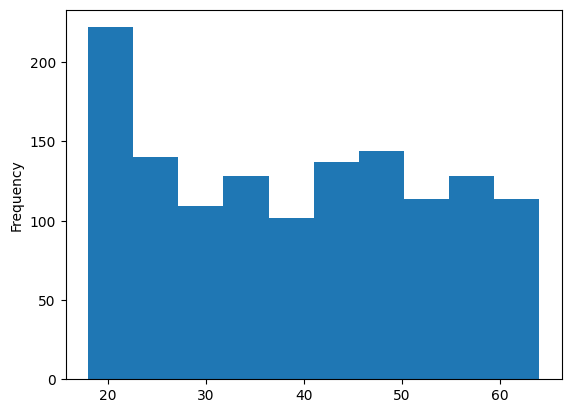

In [37]:
x['age'].plot(kind='hist')

<Axes: ylabel='Frequency'>

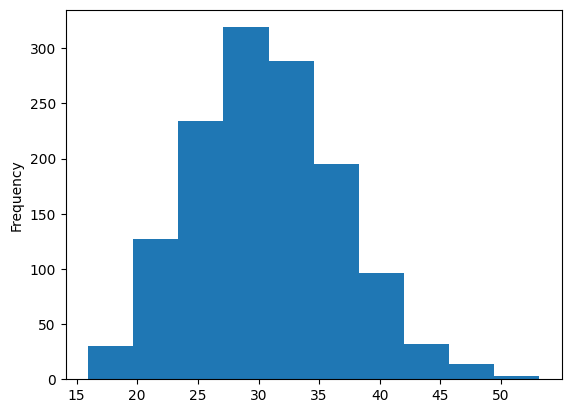

In [38]:
x['bmi'].plot(kind='hist')

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [40]:
df = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [41]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [42]:
# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(),["age","bmi","children"]),
    (OneHotEncoder(handle_unknown="ignore"),["sex","smoker","region"])
)

# Create x & y
x = df.drop("charges",axis=1)
y = df["charges"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# Now fit the column transformer to our traning data
ct.fit(x_train)

# Transform traning and test data with normalization MinMaxScaler and OneHotEncoder
x_train_normal = ct.transform(x_train)
x_test_normal = ct.transform(x_test)

In [43]:
x_train

,age,sex,bmi,children,smoker,region
560,46,female,19.950,2,no,northwest
1285,47,female,24.320,0,no,northeast
1142,52,female,24.860,0,no,southeast
969,39,female,34.320,5,no,southeast
486,54,female,21.470,3,no,northwest
...,...,...,...,...,...,...
1095,18,female,31.350,4,no,northeast
1130,39,female,23.870,5,no,southeast
1294,58,male,25.175,0,no,northeast
860,37,female,47.600,2,yes,southwest


In [44]:
x_train_normal

array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [45]:
x_train.shape , x_train_normal.shape

((1070, 6), (1070, 11))

#### Now build a neural network model

In [48]:
# Build a neural network
tf.random.set_seed(42)

# 1. Create a model
insurance_model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_5.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["mae"])

# 3. Fit the model
history = insurance_model_5.fit(x_train_normal,y_train,epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 3ms/step - loss: 13343.3613 - mae: 13343.3613
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 13333.1104 - mae: 13333.1104
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 13308.6221 - mae: 13308.6221
Epoch 4/200
34/34 [==============================] - 0s 3ms/step - loss: 13258.9443 - mae: 13258.9443
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 13173.0488 - mae: 13173.0488
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 13040.1104 - mae: 13040.1104
Epoch 7/200
34/34 [==============================] - 0s 3ms/step - loss: 12849.9229 - mae: 12849.9229
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 12592.4961 - mae: 12592.4961
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 12257.7383 - mae: 12257.7383
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 11844.40

In [49]:
insurance_model_5.evaluate(x_test_normal,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3167.5569 - mae: 3167.5569


[3167.556884765625, 3167.556884765625]

Text(0.5, 0, 'epochs')

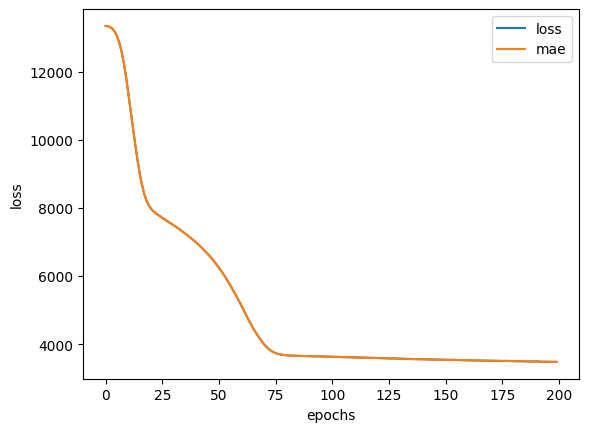

In [50]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")